# Objectif de charger les données 

In [69]:
import pandas as pd
import os
import json
import glob
import sqlite3, sqlalchemy

In [70]:
#lire le fichier json des paramètres 
with open('../parameters.json') as json_data:
    params = json.load(json_data)
    
DATA_DIR = params['DIRECTORIES']['DATA_DIR']
TMP_DIR = params['DIRECTORIES']['TMP_DIR']
PRICE_FILE = params['FILES']['PRICE_FILE']
STATION_FILE = params['FILES']['STATION_FILE']
SERVICE_FILE = params['FILES']['SERVICE_FILE']
#ici on en profite pour faire tt de suite le path os join
GAS_DB = os.path.join(DATA_DIR, params['DATABASES']['GAS_DB'])

In [71]:
#ce code si on avait pas utilsier le fichier param json

#constante, on met souvent en majusucles. 
#utiliser nom anglais et simple pour sauvegarder les path qu'on va utiliser
#DATA_DIR = 'C:/Users/t15021596/Hands-on-Project---CT/data'
#ou utiliser l emode relatif, ici poru au autre dossier tmp
#TMP_DIR = '../../tmp'

In [72]:
gas_files = glob.glob(os.path.join(DATA_DIR, "Prix*.zip"))
stations_file = 'stations2016.zip'
services_file = 'services2016.zip'

In [73]:
gas_files

['../../data\\Prix2014.zip',
 '../../data\\Prix2015.zip',
 '../../data\\Prix2016.zip']

In [74]:
#boucle pour concatener les 3 années
dfall = pd.DataFrame()

for year in gas_files:
    df=pd.read_csv(year, sep=';',header=None, dtype={1: str})

    df.columns = ['id_station','code_postal','type_station','latitude',
                  'longitude','date_releve','type_carburant',
                  'libelle_carburant','prix']
    dfall = pd.concat([dfall, df], axis=0)

#axis = 0 c'est pour concatener dessus dessous    

dfall.shape
assert dfall.shape[1] == 9, "Pas bon nb de colonne"
#nb de ligne = 9 ? pour verifier, sinon met messagage d'erreur

In [75]:
dfall.shape

(9401381, 9)

In [76]:
dfstations = pd.read_csv(os.path.join(DATA_DIR,stations_file), sep='|', header=None, encoding='utf-8',dtype={1: str})
dfstations.columns = ['id_station','code_postal','type_station','latitude','longitude','adresse','ville']

In [77]:
dfstations.head()

,id_station,code_postal,type_station,latitude,longitude,adresse,ville
0,1000001,01000,R,4.620114e+06,519791.000000,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,1000002,01000,R,4.621842e+06,522767.000000,16 Avenue de Marboz,BOURG-EN-BRESSE
2,1000004,01000,R,4.618836e+06,524447.000000,20 Avenue du Maréchal Juin,Bourg-en-Bresse
3,1000005,01000,R,4.620094e+06,519942.024022,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG
4,1000006,01000,R,4.620754e+06,523758.000000,1 Boulevard John Kennedy,BOURG-EN-BRESSE


In [78]:
dfservices = pd.read_csv(os.path.join(DATA_DIR,services_file), sep='|', header=None, encoding='utf-8',dtype={1: str})
dfservices.columns = ['id_station','code_postal','type_station','latitude','longitude','services']

In [79]:
dfservices.head()

,id_station,code_postal,type_station,latitude,longitude,services
0,1000001,01000,R,4.620114e+06,519791.000000,"Station de gonflage,Vente de gaz domestique,Au..."
1,1000002,01000,R,4.621842e+06,522767.000000,"Vente de gaz domestique,Automate CB"
2,1000004,01000,R,4.618836e+06,524447.000000,"Carburant qualité supérieure,GPL,Toilettes pub..."
3,1000005,01000,R,4.620094e+06,519942.024022,"Carburant qualité supérieure,Station de lavage..."
4,1000006,01000,R,4.620754e+06,523758.000000,Vente de gaz domestique


In [80]:
 #sauver nos donnees dans DATA_DIR
    #pickle format efficace
dfall.to_pickle(os.path.join(DATA_DIR, PRICE_FILE))
dfstations.to_pickle(os.path.join(DATA_DIR, STATION_FILE))
dfservices.to_pickle(os.path.join(DATA_DIR, SERVICE_FILE))

In [81]:
#créer base de données
cnx = sqlite3.connect(GAS_DB)

In [82]:
#prendre un dataframe et l'envoyer en mode sql sur cette base de données
dfall.to_sql('prices', cnx, index=False, if_exists='replace')

In [83]:
#idem pour dataset stations et services
dfstations.to_sql('stations', cnx, index=False, if_exists='replace')
dfservices.to_sql('services', cnx, index=False, if_exists='replace')

In [84]:
pd.read_sql_query('select * from prices where code_postal="13001"', cnx)

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,13001001,13001,R,4330446.0,538957.0,2014-01-01 06:00:00,1.0,Gazole,1399.0
1,13001001,13001,R,4330446.0,538957.0,2014-01-07 06:00:00,1.0,Gazole,1389.0
2,13001001,13001,R,4330446.0,538957.0,2014-01-24 06:00:00,1.0,Gazole,1389.0
3,13001001,13001,R,4330446.0,538957.0,2014-01-25 06:00:00,1.0,Gazole,1384.0
4,13001001,13001,R,4330446.0,538957.0,2014-01-28 06:00:00,1.0,Gazole,1389.0
5,13001001,13001,R,4330446.0,538957.0,2014-01-29 06:00:00,1.0,Gazole,1389.0
6,13001001,13001,R,4330446.0,538957.0,2014-01-30 06:00:00,1.0,Gazole,1389.0
7,13001001,13001,R,4330446.0,538957.0,2014-02-14 06:00:00,1.0,Gazole,1394.0
8,13001001,13001,R,4330446.0,538957.0,2014-02-18 06:00:00,1.0,Gazole,1399.0
9,13001001,13001,R,4330446.0,538957.0,2014-02-26 06:00:00,1.0,Gazole,1394.0


In [85]:
#curseur. utile pour faire choses progressivement / morceau par morceau si on a bcp de lignes à charger d'un coup et qu'on a pas bcp de memoire. 
cur = cnx.cursor()

In [86]:
cur.execute('SELECT * FROM prices WHERE prix > 1400')
res = cur.fetchall()

In [87]:
res[:2]

[(1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-02-28 10:28:03',
  1.0,
  'Gazole',
  1535.0),
 (1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-03-22 08:55:00',
  1.0,
  'Gazole',
  1529.0)]

In [88]:
res_df = pd.read_sql_query('SELECT * FROM prices WHERE prix > 1400',cnx)

In [89]:
res_df.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,1000001,01000,R,4620114.0,519791.0,2014-02-28 10:28:03,1.0,Gazole,1535.0
1,1000001,01000,R,4620114.0,519791.0,2014-03-22 08:55:00,1.0,Gazole,1529.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,2.0,SP95,1499.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,2.0,SP95,1499.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,2.0,SP95,1499.0


In [90]:
import numpy as np

In [91]:
#convertir la colonne date_releve en bon date type
dfall['date_releve'] = pd.to_datetime(dfall.date_releve)

In [92]:
dfall.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,1.0,Gazole,1304.0
1,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,1.0,Gazole,1304.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,1.0,Gazole,1304.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-06 09:07:51,1.0,Gazole,1304.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-07 09:23:56,1.0,Gazole,1304.0


In [93]:
#verificationdu cght de type datetime
dfall.dtypes

id_station                    int64
code_postal                  object
type_station                 object
latitude                    float64
longitude                   float64
date_releve          datetime64[ns]
type_carburant              float64
libelle_carburant            object
prix                        float64
dtype: object

In [94]:
dfall.date_releve.dt.week.head()

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: date_releve, dtype: float64

In [95]:
#créer la variable semaine à partir de ce qu'on vient de faire, de façon "manuelle"
dfall['semaine']= dfall.date_releve.dt.week + 52 *(dfall.date_releve.dt.year -2014)

In [96]:
dfall.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix,semaine
0,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,1.0,Gazole,1304.0,1.0
1,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,1.0,Gazole,1304.0,1.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,1.0,Gazole,1304.0,1.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-06 09:07:51,1.0,Gazole,1304.0,2.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-07 09:23:56,1.0,Gazole,1304.0,2.0


In [97]:
#donne 157, donc peut pas etre 3 années * 52 semaines. 
dfall.semaine.max()

157.0

In [98]:
# attention : 52 semaine en 2014 et 2015 mais 53 en 2016. 
dfall[dfall.date_releve.dt.year == 2016].date_releve.dt.week.max()

53

In [100]:
dfall.groupby(['libelle_carburant','semaine']).agg({'prix':[np.mean,min,max]}).head()

prix                
                                  mean     min     max
libelle_carburant semaine                             
E10               1.0      1380.460069  1129.0  1689.0
                  2.0      1487.090961  1249.0  1720.0
                  3.0      1478.254481  1247.0  1650.0
                  4.0      1476.861855  1350.0  1720.0
                  5.0      1478.376765  1308.0  1670.0

In [129]:
#on l'enrergistre dans uen variable
#reste index pour considerer libelle car comme colonne à part entiere, pas un index
moyenne_hebdo_df = dfall.groupby(['libelle_carburant','semaine']).agg({'prix':[np.mean]}).reset_index()

In [115]:
moyenne_hebdo_df

,libelle_carburant,semaine,prix
,,,mean
0,E10,1.0,1380.460069
1,E10,2.0,1487.090961
2,E10,3.0,1478.254481
3,E10,4.0,1476.861855
4,E10,5.0,1478.376765
5,E10,6.0,1475.062862
6,E10,7.0,1491.080956
7,E10,8.0,1495.819496
8,E10,9.0,1495.429945


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001A82AEDC390>>

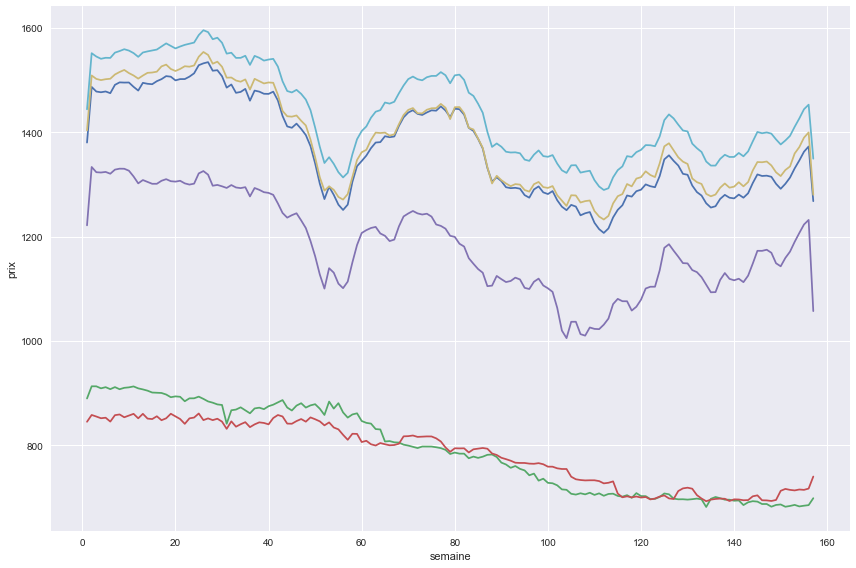

In [130]:
#graph cest les parametres de presentation du graph
graph = sns.FacetGrid(moyenne_hebdo_df, hue='libelle_carburant', size=8, aspect=1.5)
graph.map(plt.plot,"semaine","prix")
graph.add_legend()

In [123]:
#NOUVELLE METHODE PLUS EFFICACE PORU GERER LES SEMAINES AVEC DES TRUCS DEJA PROGRAMME SUR PYTHON

moyenne_hebdo_df2 = (dfall
                    .dropna(subset=['date_releve'])
                    .groupby(['libelle_carburant',pd.Grouper(key='date_releve',freq='1W')])
                    .agg({'prix':[np.mean]})
                    ).reset_index()

In [124]:
moyenne_hebdo_df2.head()
#le grouper montre la moyenne par semaine, avec le 1er jour de cahque semaine comme date_releve
#si on mettait freq = '2W' on aurait une moyenne sur 2 semaines

,libelle_carburant,date_releve,prix
,,,mean
0,E10,2014-01-05,1490.439833
1,E10,2014-01-12,1487.090961
2,E10,2014-01-19,1478.254481
3,E10,2014-01-26,1476.861855
4,E10,2014-02-02,1478.376765
5,E10,2014-02-09,1475.062862
6,E10,2014-02-16,1491.080956
7,E10,2014-02-23,1495.819496
8,E10,2014-03-02,1495.429945


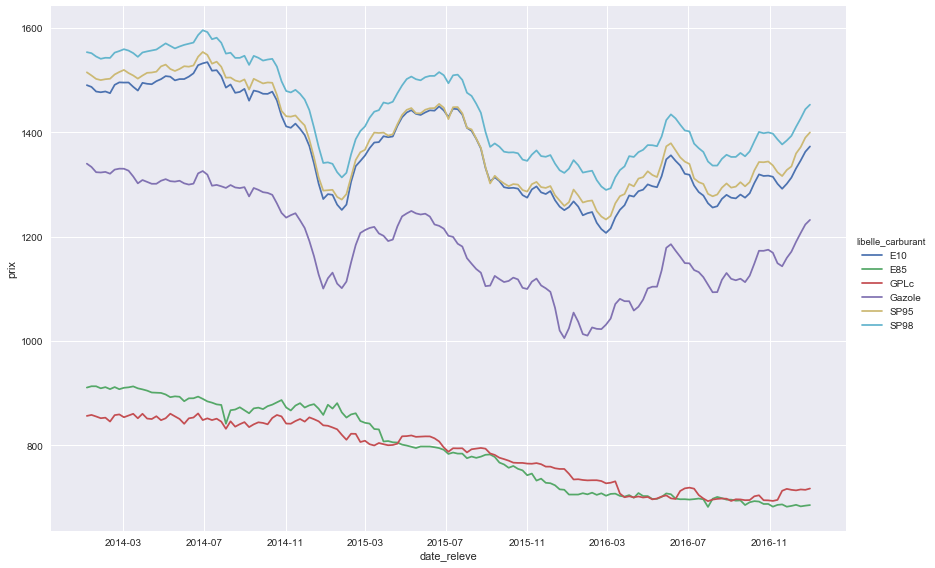

In [131]:
graph = sns.FacetGrid(moyenne_hebdo_df2, hue='libelle_carburant', size=8, aspect=1.5)
graph.map(plt.plot,"date_releve","prix")
graph.add_legend()

In [132]:
dfservices.head()

,id_station,code_postal,type_station,latitude,longitude,services
0,1000001,01000,R,4.620114e+06,519791.000000,"Station de gonflage,Vente de gaz domestique,Au..."
1,1000002,01000,R,4.621842e+06,522767.000000,"Vente de gaz domestique,Automate CB"
2,1000004,01000,R,4.618836e+06,524447.000000,"Carburant qualité supérieure,GPL,Toilettes pub..."
3,1000005,01000,R,4.620094e+06,519942.024022,"Carburant qualité supérieure,Station de lavage..."
4,1000006,01000,R,4.620754e+06,523758.000000,Vente de gaz domestique


In [136]:
dfservices.services.str.split(',').head()

0    [Station de gonflage, Vente de gaz domestique,...
1               [Vente de gaz domestique, Automate CB]
2    [Carburant qualité supérieure, GPL, Toilettes ...
3    [Carburant qualité supérieure, Station de lava...
4                            [Vente de gaz domestique]
Name: services, dtype: object

In [137]:
#on crée une colonne liste_services avec la commande précédente
dfservices['liste_services'] = dfservices.services.str.split(',')